In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy  # for deep copy
import math
%matplotlib inline

In [2]:
a1 = [6, 4, 5, 10]
a2 = [8, 5, 3, 3]
a3 = [5, 4, 8, 4]
a4 = [4, 11, 7, 13]
a5 = [5, 8, 7, 6]
a6 = [7, 3, 5, 9]

In [4]:
dice = np.array([a1, a2, a3, a4, a5, a6])

In [6]:
from scipy import stats

stats.chi2_contingency(dice)

(16.490612061288754,
 0.35021521809742745,
 15,
 array([[ 5.83333333,  5.83333333,  5.83333333,  7.5       ],
        [ 4.43333333,  4.43333333,  4.43333333,  5.7       ],
        [ 4.9       ,  4.9       ,  4.9       ,  6.3       ],
        [ 8.16666667,  8.16666667,  8.16666667, 10.5       ],
        [ 6.06666667,  6.06666667,  6.06666667,  7.8       ],
        [ 5.6       ,  5.6       ,  5.6       ,  7.2       ]]))

In [10]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print(chi2_stat)
print(p_val)
print(dof)

16.490612061288754
0.35021521809742745
15


## Ex2

In [11]:
men = [207,282]
women = [231,242]
ar = np.array([men,women])


chi2_stat, p_val, dof, ex = stats.chi2_contingency(ar)
print(chi2_stat)
print(p_val)
print(dof)

## Ex3

In [17]:
boys = [48,36,29,31,15,4]
girls =[19,35,33,11,21,28]
ar2 = np.array([boys,girls])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(ar2)
print(chi2_stat)
print(p_val)
print(dof)


40.630626493245146
1.114104790908428e-07
5


##  ex 4

In [19]:
a1 = [15,56]
a2 = [19,37]
a3=[34,35]
a4=[51,23]
ar3 = np.array([a1,a2,a3,a4])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(ar3)
print(chi2_stat)
print(p_val)
print(dof)

36.795113057987386
5.0843273728433166e-08
3


## Real World Example

#### we are interested in the relationship between 'sex' and 'hours-per-week' worked.

In [76]:
df =pd.read_csv('D:\NitinCSV\ExML\census.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### convert the numerical column 'hours-per-week' into a categorical column using pandas. Then we'll assign 'sex' and 'hours_per_week_categories' to a new dataframe.

In [77]:
def process_hours(df):
    cut_points = [0,9,19,29,39,49,1000]
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    df["hours_per_week_categories"] = pd.cut(df["hours-per-week"],
                                             cut_points,labels=label_names)
    return df

In [31]:
df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [78]:
df = process_hours(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age                          32561 non-null int64
workclass                    32561 non-null object
fnlwgt                       32561 non-null int64
education                    32561 non-null object
education-num                32561 non-null int64
marital-status               32561 non-null object
occupation                   32561 non-null object
relationship                 32561 non-null object
race                         32561 non-null object
sex                          32561 non-null object
capital-gain                 32561 non-null int64
capital-loss                 32561 non-null int64
hours-per-week               32561 non-null int64
native-country               32561 non-null object
income                       32561 non-null object
hours_per_week_categories    32561 non-null category
dtypes: category(1), int64(6), object(9)
memory usage: 2.6+ MB


In [79]:
df[['sex' , 'hours_per_week_categories']].head()

,sex,hours_per_week_categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [80]:
df["hours_per_week_categories"].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [81]:
df.groupby(["sex"]).hours_per_week_categories.value_counts()

sex      hours_per_week_categories
 Female  40-49                         5636
         30-39                         1914
         20-29                         1287
         50+                           1028
         10-19                          671
         0-9                            235
 Male    40-49                        12700
         50+                           5434
         30-39                         1753
         20-29                         1105
         10-19                          575
         0-9                            223
Name: hours_per_week_categories, dtype: int64

In [82]:
pd.crosstab(df.hours_per_week_categories,df.sex)

sex,Female,Male
hours_per_week_categories,,
40-49,235,223
10-19,671,575
50+,1287,1105
30-39,1914,1753
20-29,5636,12700
0-9,1028,5434


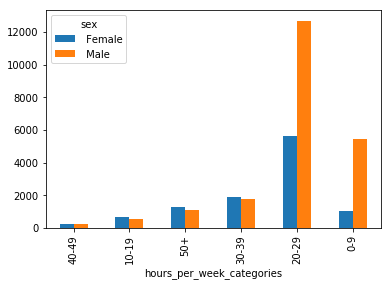

In [83]:
pd.crosstab(df.hours_per_week_categories,df.sex).plot(kind="bar")

In [84]:
pd.crosstab(df.sex,df.hours_per_week_categories)

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,1028,671,5636,1914,235,1287
Male,5434,575,12700,1753,223,1105


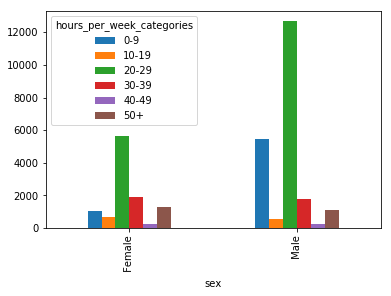

In [85]:
pd.crosstab(df.sex,df.hours_per_week_categories).plot(kind="bar")

## The Null and Alternate Hypotheses
### H0:There is no statistically significant relationship between sex and the # of hours per week worked. 
### Ha:There is a statistically significant relationship between sex and the # of hours per week worked.

In [86]:
## Constructing the Contingency Table ; margins = True will provide column and row wise sum
contingency_table = pd.crosstab(df.sex,df.hours_per_week_categories)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,1028,671,5636,1914,235,1287
Male,5434,575,12700,1753,223,1105


In [87]:
# format the observed values into a two-dimensional array and plug it into the function
a1= contingency_table.iloc[0 ,0:6].values
a2 = contingency_table.iloc[1 ,0:6].values
f_obs = np.array([a1,a2])

In [88]:
f_obs

array([[ 1028,   671,  5636,  1914,   235,  1287],
       [ 5434,   575, 12700,  1753,   223,  1105]], dtype=int64)

In [89]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(f_obs)
print("chi Sq :{0}".format(chi2_stat))
print("P Val:{0} ".format(  p_val))
print("DOF: {0}".format( dof))

chi Sq :2287.19094393
P Val:0.0 
DOF: 5


## Conclusions
##### With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'sex' and the 'hours-per-week' column. We don't know what this relationship is, but we do know that these two variables are :
### not independent of each other.

## Binning Example
### Putting continuous data in buckets

In [114]:
cut_points = [10, 50, 100, 150, 200]

print(cut_points)

labels = range(len(cut_points)-1)
print(labels)

labels_str = ['Poor','Avg','Good','Excellent']

dfTest = pd.DataFrame()
dfTest["Amount"] = [100,150,140,50,160,170,20,50,60,90,100]


dfTest["AmountRange"] = pd.cut(dfTest.Amount,bins = cut_points, labels=labels)
dfTest["AmountRange1"] = pd.cut(dfTest.Amount,bins = cut_points, labels=labels_str)
dfTest


[10, 50, 100, 150, 200]
[0, 1, 2, 3]


,Amount,AmountRange,AmountRange1
0,100,1,Avg
1,150,2,Good
2,140,2,Good
3,50,0,Poor
4,160,3,Excellent
5,170,3,Excellent
6,20,0,Poor
7,50,0,Poor
8,60,1,Avg
9,90,1,Avg
